In [1]:
import pandas as pd
import chardet
import seaborn as sns

In [2]:
dmeteo2021 = pd.read_csv('meteo_202109-202112.csv')
dmeteo2022 = pd.read_csv('meteo_202201-202212.csv')
dmeteo2023 = pd.read_csv('meteo_202301-202304.csv')

In [3]:
dmeteo2021.shape

(2928, 15)

In [4]:
dmeteo2022.shape

(8760, 15)

In [5]:
dmeteo2023.shape

(1752, 15)

In [6]:
dmeteo = pd.concat([dmeteo2021, dmeteo2022])

In [7]:
ruta_archivo = 'energia_202301-202304.csv'

with open(ruta_archivo, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

denergia2023 = pd.read_csv(ruta_archivo, encoding=encoding)

ruta_archivo = 'energia_202201-202212.csv'

with open(ruta_archivo, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

denergia2022 = pd.read_csv(ruta_archivo, encoding=encoding)

ruta_archivo = 'energia_202109-202112.csv'

with open(ruta_archivo, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

denergia2021 = pd.read_csv(ruta_archivo, encoding=encoding)

In [8]:
denergia2021.shape

(2256, 6)

In [9]:
denergia2022.shape

(8760, 6)

In [10]:
denergia2023.shape

(2256, 5)

In [11]:
denergia = pd.concat([denergia2021, denergia2022])

In [12]:
dmeteo.columns

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')

In [13]:
denergia.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')

<Axes: >

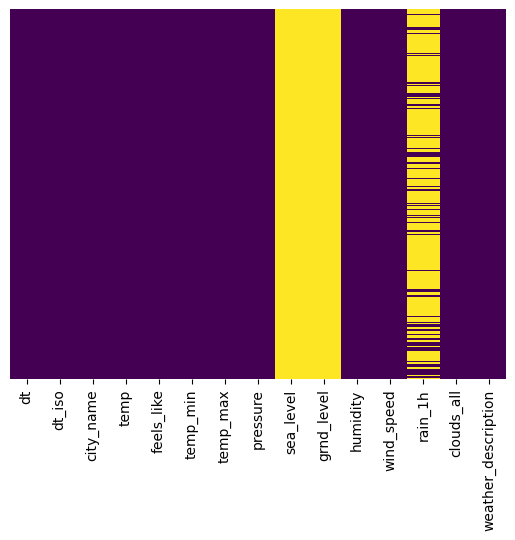

In [14]:
sns.heatmap(dmeteo.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
dmeteo = dmeteo.drop(['sea_level','grnd_level','rain_1h','city_name'], axis=1)

<Axes: >

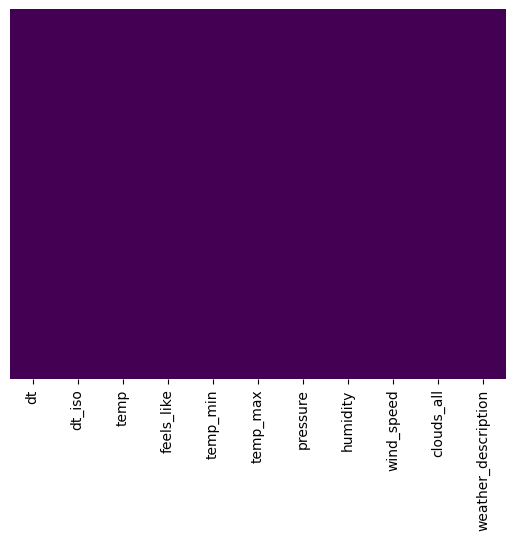

In [16]:
sns.heatmap(dmeteo.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

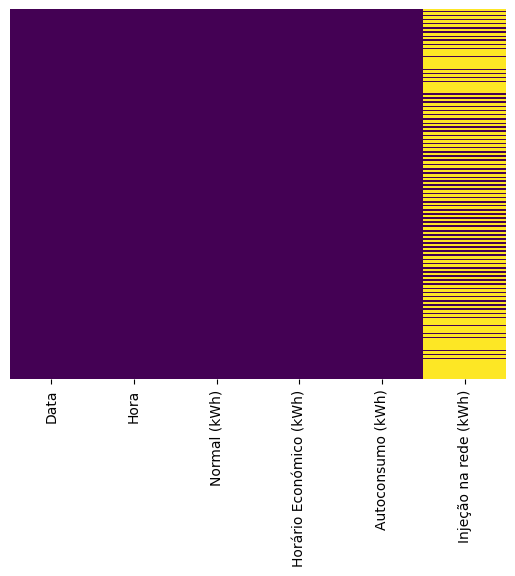

In [17]:
sns.heatmap(denergia.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
denergia['Injeção na rede (kWh)'] = denergia['Injeção na rede (kWh)'].fillna('None')

<Axes: >

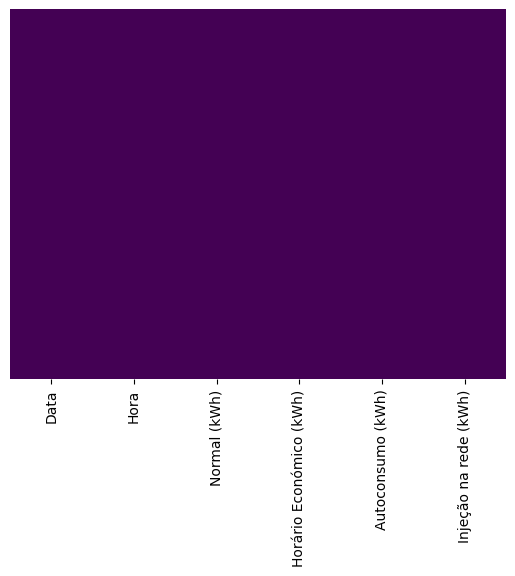

In [19]:
sns.heatmap(denergia.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
denergia.head

<bound method NDFrame.head of             Data  Hora  Normal (kWh)  Horário Económico (kWh)  \
0     2021-09-29     0         0.000                    0.000   
1     2021-09-29     1         0.000                    0.000   
2     2021-09-29     2         0.000                    0.000   
3     2021-09-29     3         0.000                    0.000   
4     2021-09-29     4         0.000                    0.000   
...          ...   ...           ...                      ...   
8755  2022-12-31    19         1.693                    0.000   
8756  2022-12-31    20         1.327                    0.000   
8757  2022-12-31    21         0.757                    0.000   
8758  2022-12-31    22         0.000                    0.675   
8759  2022-12-31    23         0.000                    0.403   

      Autoconsumo (kWh) Injeção na rede (kWh)  
0                   0.0                  None  
1                   0.0                  None  
2                   0.0                  None

In [21]:
dmeteo2023.isna().any()

dt                     False
dt_iso                 False
city_name              False
temp                   False
feels_like             False
temp_min               False
temp_max               False
pressure               False
sea_level               True
grnd_level              True
humidity               False
wind_speed             False
rain_1h                 True
clouds_all             False
weather_description    False
dtype: bool

In [22]:
denergia.keys()

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')

In [23]:
denergia2023.isna().any()

Data                       False
Hora                       False
Normal (kWh)               False
Horário Económico (kWh)    False
Autoconsumo (kWh)          False
dtype: bool

In [24]:
denergia.size

66096

In [25]:
dmeteo.size

128568

In [26]:
denergia.nunique()

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         5
dtype: int64

In [27]:
dmeteo.nunique()

dt                     11688
dt_iso                 11688
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
humidity                  82
wind_speed               771
clouds_all               101
weather_description        8
dtype: int64

Como podemos observar en los datos de meteorologia de 2023

In [31]:
replace_map = {'Injeção na rede (kWh)': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}}

In [32]:
denergia.replace(replace_map,inplace=True)
denergia.head

<bound method NDFrame.head of             Data  Hora  Normal (kWh)  Horário Económico (kWh)  \
0     2021-09-29     0         0.000                    0.000   
1     2021-09-29     1         0.000                    0.000   
2     2021-09-29     2         0.000                    0.000   
3     2021-09-29     3         0.000                    0.000   
4     2021-09-29     4         0.000                    0.000   
...          ...   ...           ...                      ...   
8755  2022-12-31    19         1.693                    0.000   
8756  2022-12-31    20         1.327                    0.000   
8757  2022-12-31    21         0.757                    0.000   
8758  2022-12-31    22         0.000                    0.675   
8759  2022-12-31    23         0.000                    0.403   

      Autoconsumo (kWh)  Injeção na rede (kWh)  
0                   0.0                      0  
1                   0.0                      0  
2                   0.0                   

In [33]:
denergia['Injeção na rede (kWh)'] = denergia['Injeção na rede (kWh)'].astype(int)

In [34]:
print(denergia.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    11016 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 559.4+ KB
None


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [40]:
x = denergia.drop(['Injeção na rede (kWh)','Data'], axis=1)

y = denergia['Injeção na rede (kWh)'].to_frame()

In [44]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.5, random_state=2021)

In [45]:
clf = DecisionTreeRegressor(random_state=2021)

In [48]:
clf.fit(x_train2, y_train2)

DecisionTreeRegressor(random_state=2021)

In [49]:
predictions2 = clf.predict(x_test2)

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE:  0.2190147664003873
MSE:  0.3074593520535786
SMSE:  0.5544901730901808


In [68]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [70]:
x = denergia.drop(['Injeção na rede (kWh)','Data'], axis=1)

y = denergia['Injeção na rede (kWh)'].to_frame()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [72]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Ajusta el modelo a los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = svr.predict(X_test)


C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred, squared=True))
print('SMSE: ', mean_squared_error(y_test, y_pred, squared=False))


MAE:  0.303692346796902
MSE:  0.28660947086271865
SMSE:  0.5353591979808684


In [75]:
print('MAE: ', mean_absolute_error(y_test2, predictions2))
print('MSE: ', mean_squared_error(y_test2, predictions2, squared=True))
print('SMSE: ', mean_squared_error(y_test2, predictions2, squared=False))

MAE:  0.2190147664003873
MSE:  0.3074593520535786
SMSE:  0.5544901730901808
